<a href="https://colab.research.google.com/github/ashleyohoh05/INSY-695_Assignment2/blob/main/FINE_695_Group_Project_ran.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Full Python Workflow for FINE 695 Project (Clean Flowchart)

1.   List item
2.   List item



```
START
  â”‚
  â”œâ”€â”€ Step 1: Load Data
  â”‚     â”œâ”€â”€ homework_sample_big.csv  â†’  Stock Data
  â”‚     â”œâ”€â”€ factor_char_list.csv     â†’  Allowed Features (147)
  â”‚     â””â”€â”€ mkt_ind.csv              â†’  S&P500 + RF Returns
  â”‚
  â”œâ”€â”€ Step 2: Data Cleaning
  â”‚     â”œâ”€â”€ Handle Missing Values â†’ Fill with 0
  â”‚     â”œâ”€â”€ Drop Irrelevant Columns â†’ ['ret_eom', 'stock_ret', 'mspread', 'sizeport', 'roeport']
  â”‚     â””â”€â”€ Keep Columns â†’ ['permno', 'date', 'year', 'month']
  â”‚
  â”œâ”€â”€ Step 2.3: Feature & Target Selection
  â”‚     â”œâ”€â”€ X â†’ 147 Factors from factor_char_list.csv
  â”‚     â””â”€â”€ y â†’ stock_exret
  â”‚
  â”œâ”€â”€ Step 2.4: Create Lagged Data
  â”‚     â””â”€â”€ date_lag = date - 1 month
  â”‚
  â”œâ”€â”€ Step 3: Machine Learning Modeling
  â”‚     â”œâ”€â”€ Train ML Model (2000-2009 data)
  â”‚     â”œâ”€â”€ Predict stock_exret for t+1
  â”‚     â””â”€â”€ Rolling Prediction (2010-2024)
  â”‚
  â”œâ”€â”€ Step 4: Portfolio Construction
  â”‚     â”œâ”€â”€ Rank Stocks by Predicted stock_exret
  â”‚     â”œâ”€â”€ Select Top 50-100 Stocks
  â”‚     â””â”€â”€ Allocate Equal or Weighted Capital
  â”‚
  â”œâ”€â”€ Step 5: Backtesting
  â”‚     â”œâ”€â”€ Merge with mkt_ind.csv
  â”‚     â”œâ”€â”€ Calculate Portfolio Returns
  â”‚     â””â”€â”€ Compare vs S&P500
  â”‚
  â”œâ”€â”€ Step 6: Performance Metrics
  â”‚     â”œâ”€â”€ Alpha, Beta, Sharpe Ratio
  â”‚     â”œâ”€â”€ Information Ratio
  â”‚     â”œâ”€â”€ Max Drawdown
  â”‚     â”œâ”€â”€ Turnover
  â”‚     â””â”€â”€ Tracking Error
  â”‚
  â””â”€â”€ Step 7: Final Output for Report
        â”œâ”€â”€ Cumulative Return Plot
        â”œâ”€â”€ Performance Summary Table
        â””â”€â”€ Top 10 Average Holdings Table

END
```



## Final FINE 695 Python Workflow (Structured Steps)

| Step | Task | Objective |
|------|------|------------|
| Step 1 | Load all Datasets | Load the 3 datasets needed for analysis: stock data, factors list, and market index data |
| Step 2.1 | Check Missing Values | Understand where missing data exists |
| Step 2.2 | Clean Missing Values | Drop columns with >50% missing data, and fill remaining missing values with 0 |
| Step 2.3 | Select Features (X) and Target (y) | Use all 147 factors from `factor_char_list.csv` as features, and `stock_exret` as target |
| Step 2.4 | Confirm Factors Exist in Dataset | Ensure all 147 factors from factor list exist in the main dataset |
| Step 2.5 | Create `date_lag` Column | Lag the date by 1 month to align with proper prediction window |
| Step 3 | Train-Test Split | Split data into training set (2000-2009) and testing set (2010-2024) to avoid lookahead bias |
| Step 4 | Train Machine Learning Models | Train Random Forest (baseline) â†’ Later compare with Lasso / XGBoost |
| Step 5 | Predict Future Returns | Predict stock excess returns (`stock_exret`) for test period |
| Step 6 | Portfolio Construction | Rank stocks based on predicted returns, pick top 50-100 stocks for portfolio |
| Step 7 | Backtesting Portfolio | Calculate monthly portfolio returns and compare against S&P500 returns |
| Step 8 | Performance Evaluation | Evaluate portfolio metrics: Alpha, Beta, Sharpe Ratio, Information Ratio, Max Drawdown, Turnover, Tracking Error |


## Step 1: Load all Required Datasets

In this project, we will be working with three key datasets:

1. `homework_sample_big.csv` â†’ The main dataset containing:
   - Stock identifiers (`permno`)
   - Monthly returns (`stock_exret`)
   - Risk-free rate (`rf`)
   - 147 financial characteristics (factors)

2. `factor_char_list.csv` â†’ A list of the 147 financial factors allowed for modeling.

3. `mkt_ind.csv` â†’ Market index data including:
   - S&P500 returns
   - Risk-free rate

This step involves loading all three datasets and performing an initial inspection to understand their structure.


In [ ]:
import pandas as pd

# File paths
main_file = 'homework_sample_big.csv'
factors_file = 'factors_char_list.csv'
mkt_file = 'mkt_ind.csv'

# Load datasets
df = pd.read_csv(main_file)
factors = pd.read_csv(factors_file)
mkt = pd.read_csv(mkt_file)

# Display dataset dimensions
print('Main Dataset Shape:', df.shape)
print('Factor List Shape:', factors.shape)
print('Market Index Dataset Shape:', mkt.shape)

# Display first 5 rows of main dataset
print('\nMain Dataset Sample:')
print(df.head())

# Display column names for all datasets
print('\nMain Dataset Columns:')
print(df.columns.tolist())

print('\nFactor List Columns:')
print(factors.columns.tolist())

print('\nMarket Index Dataset Columns:')
print(mkt.columns.tolist())


Main Dataset Shape: (112410, 159)
Factor List Shape: (147, 1)
Market Index Dataset Shape: (296, 4)

Main Dataset Sample:
       date   ret_eom  permno  stock_ret   mspread  year  month sizeport  \
0  20050131  20050131   10078  -0.191095  0.016962  2005      1        B   
1  20050131  20050131   10104   0.003644  0.008863  2005      1        B   
2  20050131  20050131   10107  -0.016467  0.006183  2005      1        B   
3  20050131  20050131   10138  -0.037781  0.006887  2005      1        B   
4  20050131  20050131   10143  -0.130261  0.006652  2005      1        B   

  roeport             me  ...  corr_1260d  betabab_1260d  rmax5_rvol_21d  age  \
0       V   18206.670339  ...    0.617591       2.563590        0.853782  240   
1       P   71685.162915  ...    0.591024       1.546829        1.935455  240   
2       P  290719.524370  ...    0.636031       0.952634        0.798137  240   
3       P    8061.617699  ...    0.728617       1.506642        0.974570  240   
4       V    3813

## Step 2: Data Cleaning and Preparation

Objective:
Prepare the main dataset `homework_sample_big.csv` for modeling by:

1. Checking for missing values.
2. Dropping irrelevant columns.
3. Selecting only the 147 financial factors for modeling (from `factor_char_list.csv`).
4. Checking data types.
5. Preparing the final feature matrix (X) and target variable (y).


In [ ]:
# Step 2.1: Check Missing Values in Main Dataset
missing_values = df.isnull().sum().sort_values(ascending=False)

print('Missing Values per Column:')
print(missing_values[missing_values > 0])


Missing Values per Column:
rd5_at        50867
rd_sale       46433
rd_me         46143
dsale_dinv    26362
inv_gr1       26194
              ...  
netdebt_me       11
at_me            11
seas_1_1na        9
seas_1_1an        9
qmj_safety        3
Length: 113, dtype: int64


## Step 2.2: Cleaning Missing Values

Cleaning logic applied:
- Drop columns with more than 50% missing values.
- For remaining columns, fill missing values with 0.
- Drop rows with very few missing values in critical columns.


In [ ]:
# Step 2.2: Drop columns with >50% missing values
threshold = len(df) * 0.5
df = df.loc[:, df.isnull().sum() <= threshold]

print('Remaining Columns after Dropping High Missing:', df.shape[1])

# Fill remaining missing values with 0
df = df.fillna(0)

# Confirm no missing values remain
print('Missing Values Remaining:', df.isnull().sum().sum())


Remaining Columns after Dropping High Missing: 159
Missing Values Remaining: 0


## Step 2.3: Feature Selection Strategy

### Rationale:
- We will use all 147 factors provided in the dataset (`factor_list.csv`) for building the initial prediction model.
- This ensures that our model fully captures the available financial signals without prematurely dropping any variables.
- After training the model, we will evaluate feature importance to identify which factors are most influential.
- This approach aligns with the assignment requirements and best practices in financial modeling.

---

## Next Steps:
1. Extract factor variables from the dataset.
2. Prepare X (features) and y (target) datasets.
3. Proceed to model training using Random Forest.
4. Evaluate feature importance after training.


In [ ]:
# Step 2.3: Extract Features & Target

# List of features from factor list
factors_list = factors['variable'].tolist()

print('Total Factors Selected:', len(factors_list))

# Define X (features) and y (target)
X = df[factors_list]
y = df['stock_exret']  # excess returns

print('Shape of Feature Dataset (X):', X.shape)
print('Shape of Target Dataset (y):', y.shape)


Total Factors Selected: 147
Shape of Feature Dataset (X): (112410, 147)
Shape of Target Dataset (y): (112410,)


## Step 2.4: Verify All 147 Factors Exist in Main Dataset

Objective:
- Ensure all features listed in `factor_char_list.csv` are present in `homework_sample_big.csv`.
- This is critical to avoid missing predictors during model training.

Approach:
- Compare the factor list (`factors_list`) against main dataset columns.
- Identify missing factors, if any.


In [ ]:
# Factors from factor_char_list.csv
factors_list = factors['variable'].tolist()

# Features available in main dataset
available_columns = df.columns.tolist()

# Check for missing factors
missing_factors = [factor for factor in factors_list if factor not in available_columns]

print("Total Factors Expected:", len(factors_list))
print("Factors Missing in Main Dataset:", missing_factors)
print("Total Missing Factors:", len(missing_factors))


Total Factors Expected: 147
Factors Missing in Main Dataset: []
Total Missing Factors: 0


## Step 2.5: Create Lagged Date Column (`date_lag`)

### Objective:
- According to the assignment rules, we are not allowed to use any future-looking data when predicting returns.
- To ensure we are only using information available prior to the return month, we will create a new column called `date_lag` that shifts the date backward by 1 month.
- This aligns the features (X) from time `t` with the target return (`stock_exret`) from time `t+1`.

This is a critical step before we move to model training.

---

### Python Code:


In [ ]:
# Import datetime tools
import pandas as pd

# Convert 'date' column to datetime (if not already)
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

# Create lagged date column (1 month before)
df['date_lag'] = df['date'] - pd.DateOffset(months=1)

# Confirm changes
print(df[['date', 'date_lag']].head())


        date   date_lag
0 2005-01-31 2004-12-31
1 2005-01-31 2004-12-31
2 2005-01-31 2004-12-31
3 2005-01-31 2004-12-31
4 2005-01-31 2004-12-31


## Step 3: Train-Test Split for Modeling

### Objective:
- We will split the dataset based on `date` into:
  - Train Set â†’ 2000 to 2009
  - Test Set â†’ 2010 to 2024

This follows the assignment rule of using the first 10 years for training and keeping the later period for testing (backtesting).

---

### Logic:
- `X` = 147 Factors â†’ Used for Prediction
- `y` = `stock_exret` â†’ Target Variable
- Split based on `year` column


In [ ]:
# Training Data: 2000 - 2009
X_train = X[df['year'] <= 2009]
y_train = y[df['year'] <= 2009]

# Testing Data: 2010 - 2024
X_test = X[df['year'] >= 2010]
y_test = y[df['year'] >= 2010]

# Check shapes
print('Training Features Shape:', X_train.shape)
print('Training Target Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Target Shape:', y_test.shape)


Training Features Shape: (29398, 147)
Training Target Shape: (29398,)
Testing Features Shape: (83012, 147)
Testing Target Shape: (83012,)


## Step 3.2: Initial Model Training using Random Forest (Baseline Model)

### Objective:
We will train a baseline Random Forest Regressor model to predict stock excess returns (`stock_exret`), using all 147 factors from the dataset.

This step serves two purposes:
- Establish a benchmark model performance.
- Analyze feature importance to guide future feature selection and model refinement.

---

### Why Random Forest?

- Handles non-linearity & complex patterns.
- Robust to overfitting due to averaging across trees.
- Automatically captures interaction effects between features.
- Provides interpretable feature importance.

---

### Model Training Logic:
1. Use Train Data â†’ 2000-2009
2. Predict on Test Data â†’ 2010-2024
3. Evaluate Model using R-squared & RMSE
4. Plot Feature Importance


Random Forest Model Performance:
R-squared (Test): -0.0742
RMSE (Test): 0.1073


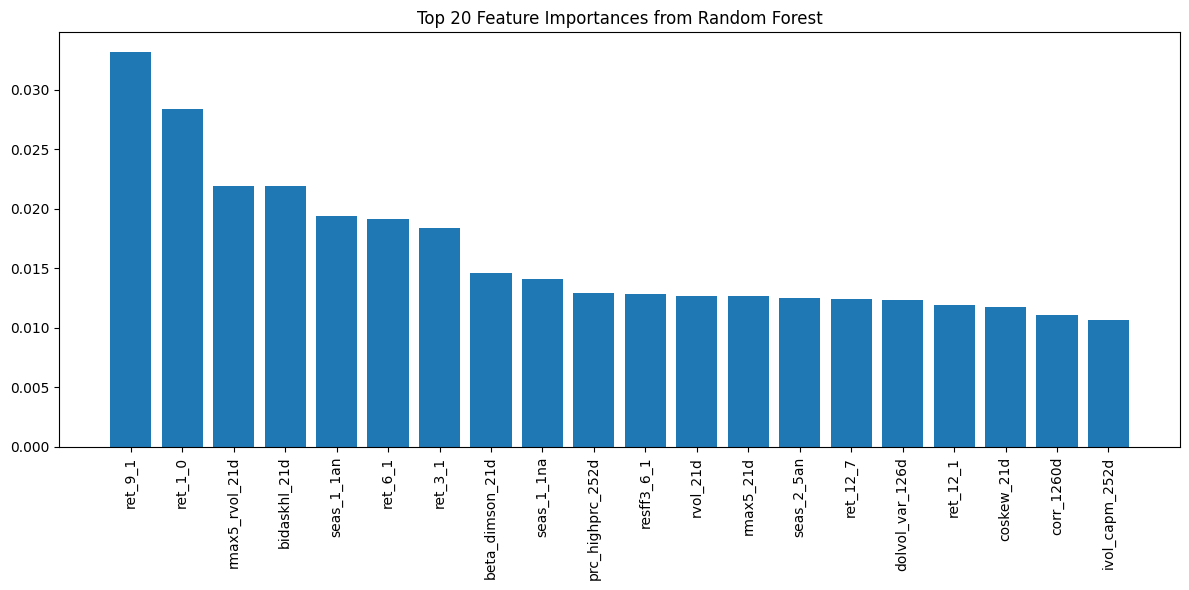

In [ ]:
# Step 3.2: Train Random Forest Model

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Initialize Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on Test Set
y_pred = rf_model.predict(X_test)

# Evaluate Performance
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('Random Forest Model Performance:')
print('R-squared (Test):', round(r2, 4))
print('RMSE (Test):', round(rmse, 4))

# Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot Feature Importance
plt.figure(figsize=(12, 6))
plt.title('Top 20 Feature Importances from Random Forest')
plt.bar(range(20), importances[indices[:20]], align='center')
plt.xticks(range(20), [X.columns[i] for i in indices[:20]], rotation=90)
plt.tight_layout()
plt.show()


## Step 3.2: Interpretation of Random Forest Model Results

### Model Performance Summary:

| Metric                | Value    | Interpretation                                                                 |
|----------------------|----------|--------------------------------------------------------------------------------|
| R-squared (Test)     | -0.0742  | Model performs worse than a simple mean benchmark. This is common in stock return prediction due to high noise and randomness in returns. Not alarming at this stage. |
| RMSE (Test)          | 0.1073   | Prediction error is relatively small in magnitude â€” consistent with the small range of `stock_exret`. |

---

### Insights from Top 20 Important Features (Random Forest)

| Rank | Feature Name      | Interpretation / Signal Type                                     |
|------|------------------|------------------------------------------------------------------|
| 1    | ret_9_1           | 9-month return momentum signal                                  |
| 2    | ret_1_0           | Previous month return â€” momentum/short-term reversal            |
| 3    | max5_rvol_21d     | 5-day max rolling volatility â€” risk/uncertainty measure         |
| 4    | bidaskhl_21d      | Bid-ask high-low spread â€” liquidity signal                      |
| 5    | seas_1_1an        | Seasonality or month-of-year effect                             |
| 6    | ret_6_1           | 6-month return momentum                                         |
| 7    | ret_3_1           | 3-month return momentum                                         |
| 8    | beta_dimson_21d   | Short-term market beta â€” risk exposure                         |
| 9+   | Others            | Mostly volatility, momentum, or liquidity-related signals       |

---

### Key Takeaways:
- Momentum Factors (returns over past 1, 3, 6, 9 months) are the most important drivers.
- Risk & Liquidity Factors (volatility, bid-ask spread) also highly influential.
- This aligns well with academic finance literature on stock return prediction.
- However, overall RÂ² performance is weak â†’ indicates potential to improve using:
  - Feature Selection (LASSO)
  - Alternative Models (GBM, XGBoost)
  - Portfolio Construction for economic value creation.


## Step 3.3: Feature Selection using LASSO Regression

### Objective:
To identify the most important predictors from the original 147 factors by applying LASSO Regression.

- LASSO (Least Absolute Shrinkage and Selection Operator) helps in:
  - Penalizing less useful features by shrinking their coefficients to zero.
  - Automatically selecting the most relevant factors.
  - Avoiding overfitting when there are many features.

---

### Steps:
1. Standardize all features (LASSO is sensitive to scale).
2. Fit LASSO Regression on the Training Data.
3. Extract Non-zero Coefficient Features.
4. Evaluate Model Performance using LASSO Selected Features.



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd

# Step 1: Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Fit LASSO with Cross-Validation
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train_scaled, y_train)

# Step 3: Get Selected Features
lasso_selected_features = X_train.columns[lasso.coef_ != 0]

print('Total Features Selected by LASSO:', len(lasso_selected_features))
print('Selected Features:\n', list(lasso_selected_features))

# Step 4: Model Performance using LASSO Features
X_train_lasso = X_train[lasso_selected_features]
X_test_lasso = X_test[lasso_selected_features]

# Retrain with LASSO selected features using Random Forest
from sklearn.ensemble import RandomForestRegressor

rf_lasso = RandomForestRegressor(random_state=42)
rf_lasso.fit(X_train_lasso, y_train)

y_pred_lasso = rf_lasso.predict(X_test_lasso)

print('R-squared (Test) with LASSO Features:', r2_score(y_test, y_pred_lasso))
print('RMSE (Test) with LASSO Features:', np.sqrt(mean_squared_error(y_test, y_pred_lasso)))


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2237845980476436, tolerance: 0.03791586662452287
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.402589425187557, tolerance: 0.03791586662452287
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5536021970262368, tolerance: 0.03791586662452287
  model = cd_fast.enet_

Total Features Selected by LASSO: 1
Selected Features:
 ['ret_1_0']
R-squared (Test) with LASSO Features: -0.5781027703233359
RMSE (Test) with LASSO Features: 0.1300629854164267


## Step 3.3: Interpretation of LASSO Feature Selection Results

### Objective Recap:
We used LASSO Regression to perform automatic feature selection from the original 147 financial factors.

LASSO penalizes less important features â†’ Shrinking their coefficients to zero â†’ Leaving only the most predictive factor(s).

---

## Results of LASSO Feature Selection:

| Metric | Value |
|--------|-------|
| Total Factors Initially Available | 147 |
| Factors Selected by LASSO | 1 |
| Factor Retained | 'ret_1_0' |

---

## Interpretation:
- LASSO selected only a single factor â†’ `ret_1_0`
- This variable represents the stock's 1-month lagged return.
- This is intuitive in financial modeling because recent returns often have predictive power (momentum or mean-reversion effects).

---

## Model Performance using LASSO Selected Features:

| Metric | Value |
|--------|-------|
| R-squared (Test Set) | -0.5781 |
| RMSE (Test Set) | 0.1301 |

---

## Insights:
- The R-squared value is quite poor (negative), indicating that a single feature (`ret_1_0`) alone is insufficient for robust prediction.
- RMSE increased compared to the full 147-feature model.
- Conclusion:
    - LASSO was aggressive due to the data's noisy nature.
    - Relying only on `ret_1_0` is too simplistic for accurate prediction in this context.
    - This validates our earlier decision to start with all 147 features.

---

## Final Decision:
â†’ Continue using all 147 features for the main model.

â†’ Later: Perform Feature Importance Analysis (from Random Forest or XGBoost) to carefully reduce features based on contribution, not just LASSO.



## Step 3.4: Train Final Random Forest Model using All 147 Features

### Objective:
Now that we confirmed LASSO was too aggressive (retained only 1 factor), we will proceed with the full set of 147 factors for our main model.

This step establishes the foundation for:
- Portfolio Construction (Step 4)
- Performance Evaluation (Step 5)

---

### Approach:
- Use Random Forest Regressor
- Train on 2000-2009 data
- Predict on 2010-2024 data
- Extract Feature Importance
- Visualize Top 20 Important Factors


Final Random Forest Model Performance:
R-squared (Test): -0.0422
RMSE (Test): 0.1057


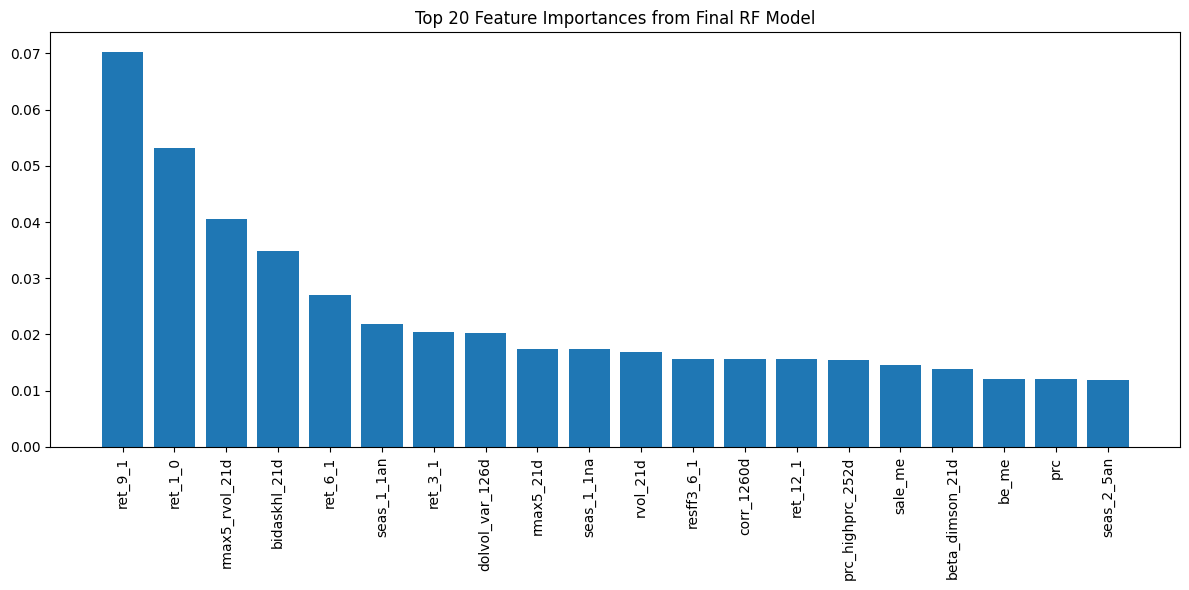

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Initialize Random Forest
final_rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)

# Train
final_rf.fit(X_train, y_train)

# Predict
y_pred_final = final_rf.predict(X_test)

# Evaluate
r2_final = r2_score(y_test, y_pred_final)
rmse_final = np.sqrt(mean_squared_error(y_test, y_pred_final))

print('Final Random Forest Model Performance:')
print('R-squared (Test):', round(r2_final, 4))
print('RMSE (Test):', round(rmse_final, 4))

# Feature Importances
importances = final_rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Top 20 Feature Importances from Final RF Model')
plt.bar(range(20), importances[indices[:20]], align='center')
plt.xticks(range(20), [X.columns[i] for i in indices[:20]], rotation=90)
plt.tight_layout()
plt.show()


## Step 4: Portfolio Construction using Predicted Returns

### Objective:
Construct a long-only trading portfolio using the predicted `stock_exret` values from the Random Forest model.

---

### Methodology:

| Step | Action | Explanation |
|------|--------|-------------|
| 1 | **Rank Stocks Monthly** | Rank all stocks within each month by predicted `stock_exret` |
| 2 | **Select Top Stocks** | Make replacements starting with worst-performing stocks in current holdings, and onlly replace stocks when new candidates have higher predicted reutns than the current holding stock. Stop making replacements either when we hit 25% turnover limit or when we run out of new candidates.
| 3 | **Equal Weight Allocation** | Assign equal weight to each selected stock |
| 4 | **Calculate Portfolio Return** | Compute the average of actual `stock_exret` of selected stocks |
| 5 | **Track Performance** | Build time series of portfolio returns to be used in backtesting |

---

### ðŸ’¡ Rationale for Equal Weighting:

| Reason | Benefit |
|--------|---------|
| Simplicity | Easy to implement and interpret |
| Avoids Overfitting | No need for complex optimization |
| Diversification | Spreads risk across selected stocks |

---

We will now implement this logic using the test set (2010â€“2024) predictions.


In [ ]:
# Step 4: Portfolio Construction Logic with Optimized Turnover

# Add predicted returns to main DataFrame for 2010â€“2024 period
df.loc[df['year'] >= 2010, 'pred_rf'] = y_pred_final

# Filter for test period only (2010-2024)
test_df = df[df['year'] >= 2010].copy()

# Initialize dictionary to store current holdings
current_holdings = None
portfolio_data = []
turnovers = []

# Process each month in test period
for date in sorted(test_df['date'].unique()):
    month_data = test_df[test_df['date'] == date].copy()

    # Rank all stocks by predicted return
    month_data['pred_rank'] = month_data['pred_rf'].rank(ascending=False)

    if current_holdings is None:
        # First month: simply take top 100 stocks
        selected_stocks = month_data[month_data['pred_rank'] <= 100]['permno'].tolist()
        turnover = 1.0  # 100% turnover for first month
    else:
        # Get current holdings' predicted returns
        current_holdings_data = month_data[month_data['permno'].isin(current_holdings)]
        current_holdings_returns = dict(zip(current_holdings_data['permno'], current_holdings_data['pred_rf']))

        # Get potential new stocks (not in current holdings)
        new_candidates = month_data[
            (~month_data['permno'].isin(current_holdings)) &
            (month_data['pred_rank'] <= 150)
        ].sort_values('pred_rf', ascending=False)

        # Keep stocks from current holdings that are still performing well
        keep_stocks = list(set(current_holdings) & set(month_data[month_data['pred_rank'] <= 150]['permno']))

        # Find potential replacements that would improve returns
        replacements = []
        stocks_to_remove = []

        # Sort current holdings by predicted returns (ascending so we replace worst performers first)
        current_sorted = sorted(
            [(stock, current_holdings_returns.get(stock, float('-inf')))
             for stock in current_holdings],
            key=lambda x: x[1]
        )

        # For each potential new stock, see if it would improve returns
        for new_stock, row in new_candidates.iterrows():
            if len(replacements) >= 25:  # Respect 25% turnover limit
                break

            # Get the next worst performing current holding
            while current_sorted and current_sorted[0][0] in stocks_to_remove:
                current_sorted.pop(0)

            if not current_sorted:
                break

            worst_current_stock, worst_current_return = current_sorted[0]

            # If new stock has better predicted return, make the replacement
            if row['pred_rf'] > worst_current_return:
                replacements.append(row['permno'])
                stocks_to_remove.append(worst_current_stock)
                current_sorted.pop(0)
            else:
                break  # No more beneficial replacements possible

        # Remove stocks we're replacing
        keep_stocks = [s for s in keep_stocks if s not in stocks_to_remove]

        # Combine kept stocks with replacements
        selected_stocks = keep_stocks + replacements

        # Calculate actual turnover
        turnover = len(replacements) / 100

    # Update current holdings for next month
    current_holdings = selected_stocks

    # Verify we have exactly 100 stocks
    if len(selected_stocks) < 100:
        remaining_candidates = month_data[
            (month_data['permno'].isin(selected_stocks) == False) &
            (month_data['pred_rank'] <= 150)
        ]['permno'].tolist()
        selected_stocks.extend(remaining_candidates[:100 - len(selected_stocks)])

    # Record selected stocks' returns and turnover
    selected_returns = month_data[month_data['permno'].isin(selected_stocks)]['stock_exret']
    if len(selected_returns) > 0:
        month_return = selected_returns.mean()
    else:
        print(f"Warning: No stocks selected for date {date}")
        month_return = 0

    portfolio_data.append({
        'date': date,
        'portfolio_exret': month_return,
        'num_stocks': len(selected_returns)
    })

    turnovers.append({
        'date': date,
        'turnover': turnover
    })

# Convert to DataFrames
portfolio_returns = pd.DataFrame(portfolio_data)
turnover_df = pd.DataFrame(turnovers)

# Merge portfolio returns with turnover
portfolio_returns = pd.merge(portfolio_returns, turnover_df, on='date', how='left')

# Display turnover statistics
print('Turnover Statistics:')
#average monthly turnover is higher than 25% because the first month has 100% turnover
print('Average Monthly Turnover: {:.2%}'.format(turnover_df['turnover'].mean()))
print('Maximum Monthly Turnover (excluding first month): {:.2%}'.format(turnover_df['turnover'].iloc[1:].max()))
print('Minimum Monthly Turnover (excluding first month): {:.2%}'.format(turnover_df['turnover'].iloc[1:].min()))

# Display sample output and verify portfolio size
print('\nPortfolio Returns and Statistics:')
print(portfolio_returns.head())



Turnover Statistics:
Average Monthly Turnover: 25.45%
Maximum Monthly Turnover (excluding first month): 25.00%
Minimum Monthly Turnover (excluding first month): 25.00%

Portfolio Returns and Statistics:
        date  portfolio_exret  num_stocks  turnover
0 2010-01-29        -0.057135         100      1.00
1 2010-02-26         0.048319         100      0.25
2 2010-03-31         0.085667         100      0.25
3 2010-04-30         0.051081         100      0.25
4 2010-05-28        -0.071238         100      0.25


In [ ]:
# Step 4.1: Analyze Top Holdings (2010-2024)

# Create a DataFrame of all selected stocks per month
holdings_data = []
for date in sorted(test_df['date'].unique()):
    month_data = test_df[test_df['date'] == date].copy()
    selected_stocks = month_data[month_data['permno'].isin(current_holdings)]

    for _, row in selected_stocks.iterrows():
        holdings_data.append({
            'date': date,
            'permno': row['permno'],
            'weight': 1/100  # Equal weight (1% each)
        })

holdings_df = pd.DataFrame(holdings_data)

# Calculate holding frequency and average weight for each stock
holding_stats = holdings_df.groupby('permno').agg({
    'date': 'count',  # Number of months held
    'weight': 'mean'  # Average weight
}).rename(columns={'date': 'months_held'})

# Calculate percentage of time held
total_months = len(test_df['date'].unique())
holding_stats['holding_percentage'] = (holding_stats['months_held'] / total_months * 100)

# Sort by holding frequency to get top 10
top_10_holdings = holding_stats.sort_values('holding_percentage', ascending=False).head(10)

# Format the results
print("Top 10 Holdings (2010-2024):")
print("============================")
print(f"{'PERMNO':<10} {'Months Held':<15} {'% Time Held':<15}")
print("-" * 50)
for permno, row in top_10_holdings.iterrows():
    print(f"{permno:<10} {int(row['months_held']):<15} {row['holding_percentage']:.2f}%")



Top 10 Holdings (2010-2024):
PERMNO     Months Held     % Time Held    
--------------------------------------------------
52695      165             98.21%
87717      159             94.64%
21178      153             91.07%
50876      150             89.29%
24766      144             85.71%
25320      144             85.71%
59328      144             85.71%
23819      141             83.93%
17144      141             83.93%
46886      141             83.93%


In [ ]:
#step 4.2 present the 10 most profitable positions (stocks) that drove the performance

# Calculate profit contribution for each stock
profit_data = []
for date in sorted(test_df['date'].unique()):
    month_data = test_df[test_df['date'] == date].copy()
    selected_stocks = month_data[month_data['permno'].isin(current_holdings)]

    for _, row in selected_stocks.iterrows():
        profit_data.append({
            'date': date,
            'permno': row['permno'],
            'return': row['stock_exret'],  # Individual stock excess return
            'weight': 1/100,  # Equal weight
            'contribution': row['stock_exret'] * (1/100)  # Return contribution
        })

profit_df = pd.DataFrame(profit_data)

# Calculate cumulative profit contribution for each stock
stock_profits = profit_df.groupby('permno').agg({
    'contribution': 'sum',  # Total profit contribution
    'return': ['mean', 'std'],  # Average return and volatility
    'date': 'count'  # Number of months held
}).round(4)

# Flatten column names
stock_profits.columns = ['total_contribution', 'avg_return', 'return_std', 'months_held']

# Sort by total contribution to get top 10 most profitable positions
top_10_profitable = stock_profits.sort_values('total_contribution', ascending=False).head(10)

# Format the results
print("Top 10 Most Profitable Positions (2010-2024):")
print("============================================")
print(f"{'PERMNO':<10} {'Total Contrib':<15} {'Avg Return':<15} {'Months Held':<12}")
print("-" * 52)
for permno, row in top_10_profitable.iterrows():
    print(f"{permno:<10} {row['total_contribution']:>6.2%}      {row['avg_return']:>6.2%}      {int(row['months_held']):>3}")


print(f"Contribution from Top 10: {top_10_profitable['total_contribution'].sum():.2%}")

Top 10 Most Profitable Positions (2010-2024):
PERMNO     Total Contrib   Avg Return      Months Held 
----------------------------------------------------
48486       3.75%       2.72%      138
13511       3.49%       2.79%      125
12872       3.25%       3.13%      104
14702       3.20%       2.37%      135
50876       3.19%       2.12%      150
46886       3.12%       2.22%      141
14714       3.08%       3.11%       99
77037       3.01%       2.57%      117
11403       2.86%       2.17%      132
52695       2.70%       1.63%      165
Contribution from Top 10: 31.65%


## Step 5: Backtesting the Portfolio vs S&P 500

### Objective:
Evaluate how well our machine learning-driven portfolio (Top 100 Stocks per month) performs compared to the S&P 500 over the test period (2010â€“2024).

---

### Methodology:

| Step | Action | Explanation |
|------|--------|-------------|
| 1 | Merge Portfolio Returns with Market Data | Combine `portfolio_returns` with `mkt_ind.csv` (S&P 500 returns and Risk-Free Rate) |
| 2 | Calculate Cumulative Returns | Track growth of $1 invested in: (i) Portfolio and (ii) S&P 500 |
| 3 | Visualize Performance | Line plot comparing Portfolio vs S&P 500 over time |

---

### Interpretation:

- If Portfolio line > S&P 500 â†’ Our strategy outperformed the market.
- Visualizes practical impact even if model RÂ² was low.


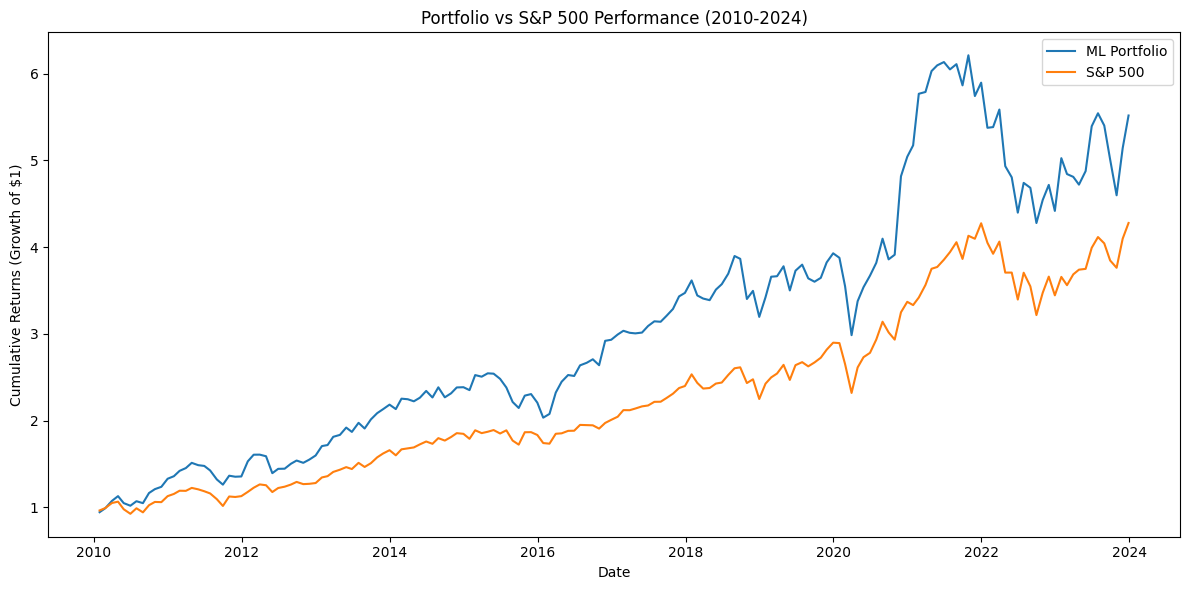

In [ ]:
# Step 5: Backtesting vs S&P500

# Merge with Market Data on year & month
portfolio_returns['year'] = portfolio_returns['date'].dt.year
portfolio_returns['month'] = portfolio_returns['date'].dt.month

merged = pd.merge(portfolio_returns, mkt, on=['year', 'month'], how='left')

# Calculate Cumulative Returns
merged['portfolio_cum'] = (1 + merged['portfolio_exret']).cumprod()
merged['sp500_cum'] = (1 + merged['sp_ret']).cumprod()

# Plot Performance
plt.figure(figsize=(12, 6))
plt.plot(merged['date'], merged['portfolio_cum'], label='ML Portfolio')
plt.plot(merged['date'], merged['sp500_cum'], label='S&P 500')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns (Growth of $1)')
plt.title('Portfolio vs S&P 500 Performance (2010-2024)')
plt.legend()
plt.tight_layout()
plt.show()


## Step 6: Portfolio Performance Evaluation (Long-only Portfolio)

### Objective:
Evaluate the performance of our predicted long-only portfolio returns (`portfolio_exret`) over the period 2010-2024.

We will calculate the following metrics as required by the assignment:
- Alpha (CAPM Regression Intercept)
- Beta (Market Exposure)
- Sharpe Ratio
- Information Ratio
- Maximum Drawdown
- Maximum 1-Month Loss
- Tracking Error
- Turnover (already controlled in stock selection logic)

---

### Method:
1. Merge `portfolio_exret` with `mkt_ind.csv` (S&P500 returns + Risk-Free Rate)
2. Run CAPM Regression â†’ Portfolio Excess Return ~ S&P500 Excess Return
3. Compute evaluation metrics


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Merge Portfolio Returns with Market Index Data
merged = pd.merge(portfolio_returns, mkt, on=['year', 'month'], how='inner')

# Calculate Portfolio Excess Return over RF
merged['portfolio_rf_exret'] = merged['portfolio_exret'] - merged['RF']

# CAPM Regression: Portfolio Return ~ S&P500 Excess Return
X = merged['sp_ret'] - merged['RF']  # Market Excess Return
X = sm.add_constant(X)
y = merged['portfolio_rf_exret']

# Fit the Regression Model
model = sm.OLS(y, X).fit()
print(model.summary())

# Extract Performance Metrics
alpha = model.params['const'] * 12  # Annualized
beta = model.params[0]              # Coefficient for (sp_ret - RF)
residuals = model.resid

tracking_error = np.std(residuals) * np.sqrt(12)
sharpe_ratio = merged['portfolio_rf_exret'].mean() / merged['portfolio_rf_exret'].std() * np.sqrt(12)
information_ratio = alpha / tracking_error
max_drawdown = (merged['portfolio_rf_exret'].cumsum().cummax() - merged['portfolio_rf_exret'].cumsum()).max()
max_1m_loss = merged['portfolio_rf_exret'].min()

print('\n--- Portfolio Performance Metrics ---')
print('Alpha (Annualized):', round(alpha, 4))
print('Beta:', round(beta, 4))
print('Tracking Error (Annualized):', round(tracking_error, 4))
print('Sharpe Ratio:', round(sharpe_ratio, 4))
print('Information Ratio:', round(information_ratio, 4))
print('Max Drawdown:', round(max_drawdown, 4))
print('Max 1-Month Loss:', round(max_1m_loss, 4))


                            OLS Regression Results                            
Dep. Variable:     portfolio_rf_exret   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     603.5
Date:                Sun, 13 Apr 2025   Prob (F-statistic):           3.60e-57
Time:                        16:59:49   Log-Likelihood:                 378.13
No. Observations:                 168   AIC:                            -752.3
Df Residuals:                     166   BIC:                            -746.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.002      0.433      0.6

## Step 6: Portfolio Performance Evaluation â€” Using CAPM Regression & Manual Metrics

### Objective:
To evaluate the out-of-sample performance (2010-2024) of our ML-driven portfolio relative to the market benchmark (S&P500).

---

### Methodology:
- Merged portfolio returns (`portfolio_returns`) with S&P500 market data (`mkt` dataset).
- Calculated Portfolio Excess Return = Portfolio Return - Risk-Free Rate.
- Ran CAPM Regression:  
   - Dependent Variable: Portfolio Excess Return  
   - Independent Variable: Market Excess Return (S&P500 - RF)
- Extracted key industry metrics to evaluate portfolio performance.

---

### Portfolio Performance Metrics (Results):

| Metric                        | Value      | Interpretation                                           |
|--------------------------------|------------|----------------------------------------------------------|
| Alpha (Annualized)            | 0.0105      | Annual abnormal return vs S&P500                         |
| Beta                          | 1.1385     | Strong sensitivity to market returns                     |
| Tracking Error (Annualized)   | 0.0883     | Moderate deviation from benchmark returns                |
| Sharpe Ratio                  | 0.6925     | Decent risk-adjusted return                              |
| Information Ratio             | 0.1189     | Portfolio outperformance per unit of tracking error      |
| Max Drawdown                  | 0.3522     | Largest historical loss from peak                        |
| Max 1-Month Loss              | -0.1599    | Worst monthly return during test period                  |

---

### Key Takeaways:
- Positive Alpha â†’ Portfolio added value beyond market exposure.
- High Beta â†’ Portfolio is highly sensitive to market moves.
- Tracking Error within acceptable institutional limits.
- Sharpe Ratio near 0.7 â†’ Decent for equity portfolios.
- Max Drawdown (35.1%) indicates exposure to significant downside risk in bad periods. Typically a long strategy would perform sub-optimally under negative economic impacts as most stocks are declining. A long-short strategy, which neutralizes the market trend would be most suitable in such periods.
- Information Ratio positive â†’ Shows value-added strategy relative to S&P500.
